In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\Credit Card Customer Data.csv")
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [11]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [13]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [3]:
df.drop(columns=['Sl_No', 'Customer Key'],inplace=True)

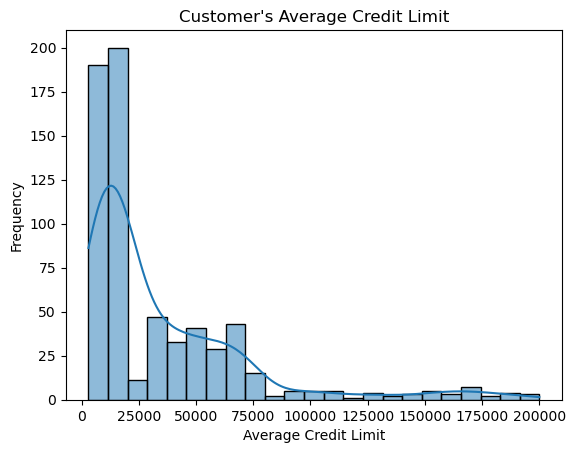

In [10]:
sns.histplot(df['Avg_Credit_Limit'], kde=True)
plt.title("Customer's Average Credit Limit")
plt.xlabel('Average Credit Limit')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['Avg_Credit_Limit'].median()

18000.0

- The median Avg_Credit_Limit is 18000

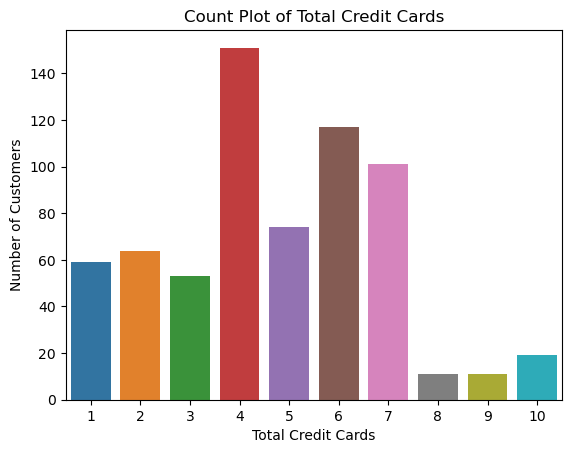

In [17]:
sns.countplot(x='Total_Credit_Cards', data=df)
plt.title('Count Plot of Total Credit Cards')
plt.xlabel('Total Credit Cards')
plt.ylabel('Number of Customers')
plt.show()

- Most of the customers have 4 Credit Cards
- There are the customers, who have upto 10 Credit Cards

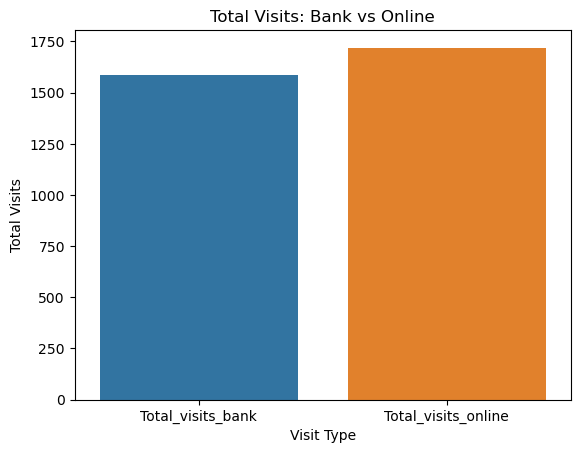

In [23]:
df_visits = df[['Total_visits_bank', 'Total_visits_online']].sum().reset_index()
df_visits.columns = ['Type', 'Count']
sns.barplot(x='Type', y='Count', data=df_visits)
plt.title('Total Visits: Bank vs Online')
plt.xlabel('Visit Type')
plt.ylabel('Total Visits')
plt.show()

- Most of the customers visit the bank vie Online

C:\Users\akash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


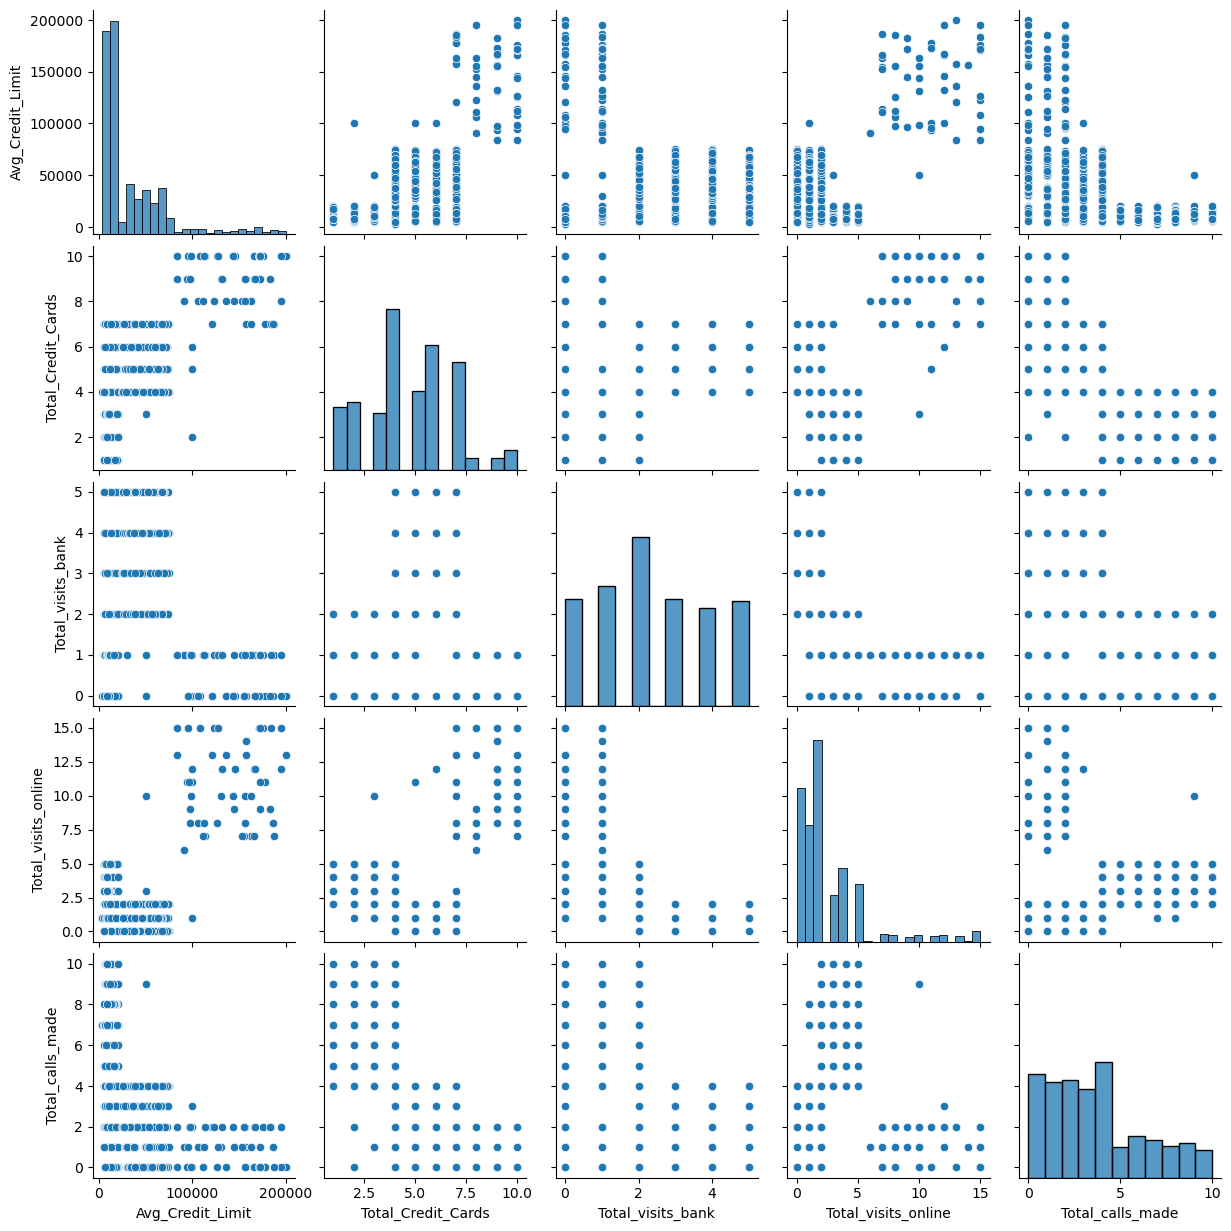

In [37]:
sns.pairplot(df)

- The plot gives a comprehensive overview of relationships between features

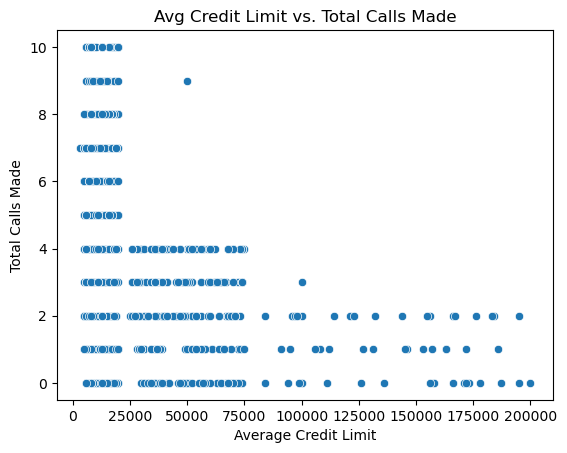

In [38]:
sns.scatterplot(x='Avg_Credit_Limit', y='Total_calls_made', data=df)
plt.title('Avg Credit Limit vs. Total Calls Made')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Calls Made')
plt.show()

In [36]:
df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


- There is weak positive Correlation between Total_Credit_Cards and Total_visits_online with Avg_Credit_Limit 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
df1 = scaler.fit_transform(df)

In [7]:
df1

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [8]:
scaled_df = pd.DataFrame(df1, columns=df.columns)
scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [9]:
x=scaled_df

In [10]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [12]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i ,init = 'k-means++', max_iter=300 ,n_init=10, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[3300.000000000001,
 2040.9898164784952,
 933.0437490000535,
 780.7736895551768,
 704.4759188657507,
 642.4285451423208,
 600.2307262933778,
 562.9699837327826,
 538.1073332196182,
 516.4200301863629]

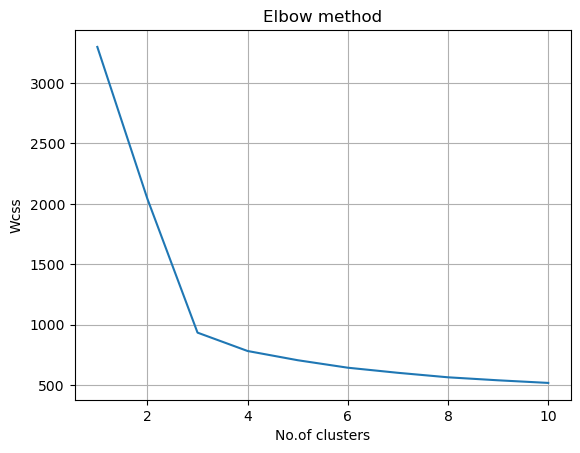

In [22]:
plt.plot(range(1,11),wcss)
plt.xlabel("No.of clusters")
plt.ylabel("Wcss")
plt.title("Elbow method")
plt.grid()
plt.show()

- From the plot ,Elbow method says that 3 cluster is better for the kmeans cluster algorithm

In [25]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter=300, n_init=10, random_state=4)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [26]:
kmeans.labels_

array([2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [66]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=4)
kmeans.fit(x)  

KMeans(n_clusters=3, n_init=10, random_state=4)

In [37]:
print(f""" Centroid of the clusters :

{kmeans.cluster_centers_}""")

 Centroid of the clusters :

[[ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]
 [-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]]


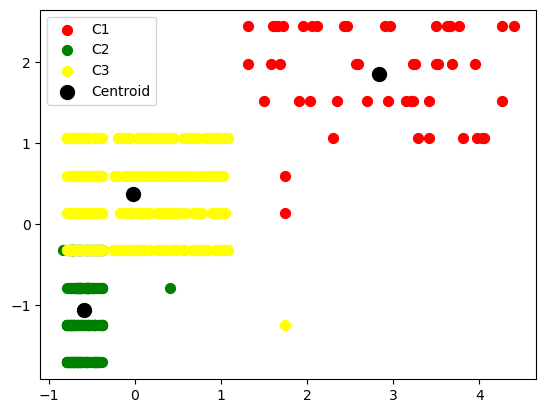

In [48]:
cluster_0_data = x[y_kmeans==0]
cluster_1_data = x[y_kmeans==1]
cluster_2_data = x[y_kmeans==2]

plt.scatter(cluster_0_data.iloc[:,0],cluster_0_data.iloc[:,1],s=50, c='red', label='C1')
plt.scatter(cluster_1_data.iloc[:,0],cluster_1_data.iloc[:,1],s=50, c='green', label= 'C2')
plt.scatter(cluster_2_data.iloc[:,0],cluster_2_data.iloc[:,1],s=50, c= 'yellow', label="C3")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='black', label='Centroid')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
silh=[]
range_n_clusters =[2,3,4,5,6,7,8]
for i in range_n_clusters:
    km = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10, random_state=4)
    km.fit(x)
    km_labels =km.labels_
    silh.append(silhouette_score(x,km_labels))

In [53]:
silh

[0.41842496663215445,
 0.5157182558881063,
 0.3556670619372605,
 0.2719872370588317,
 0.2559940061266893,
 0.24787934301251532,
 0.2267982139258844]

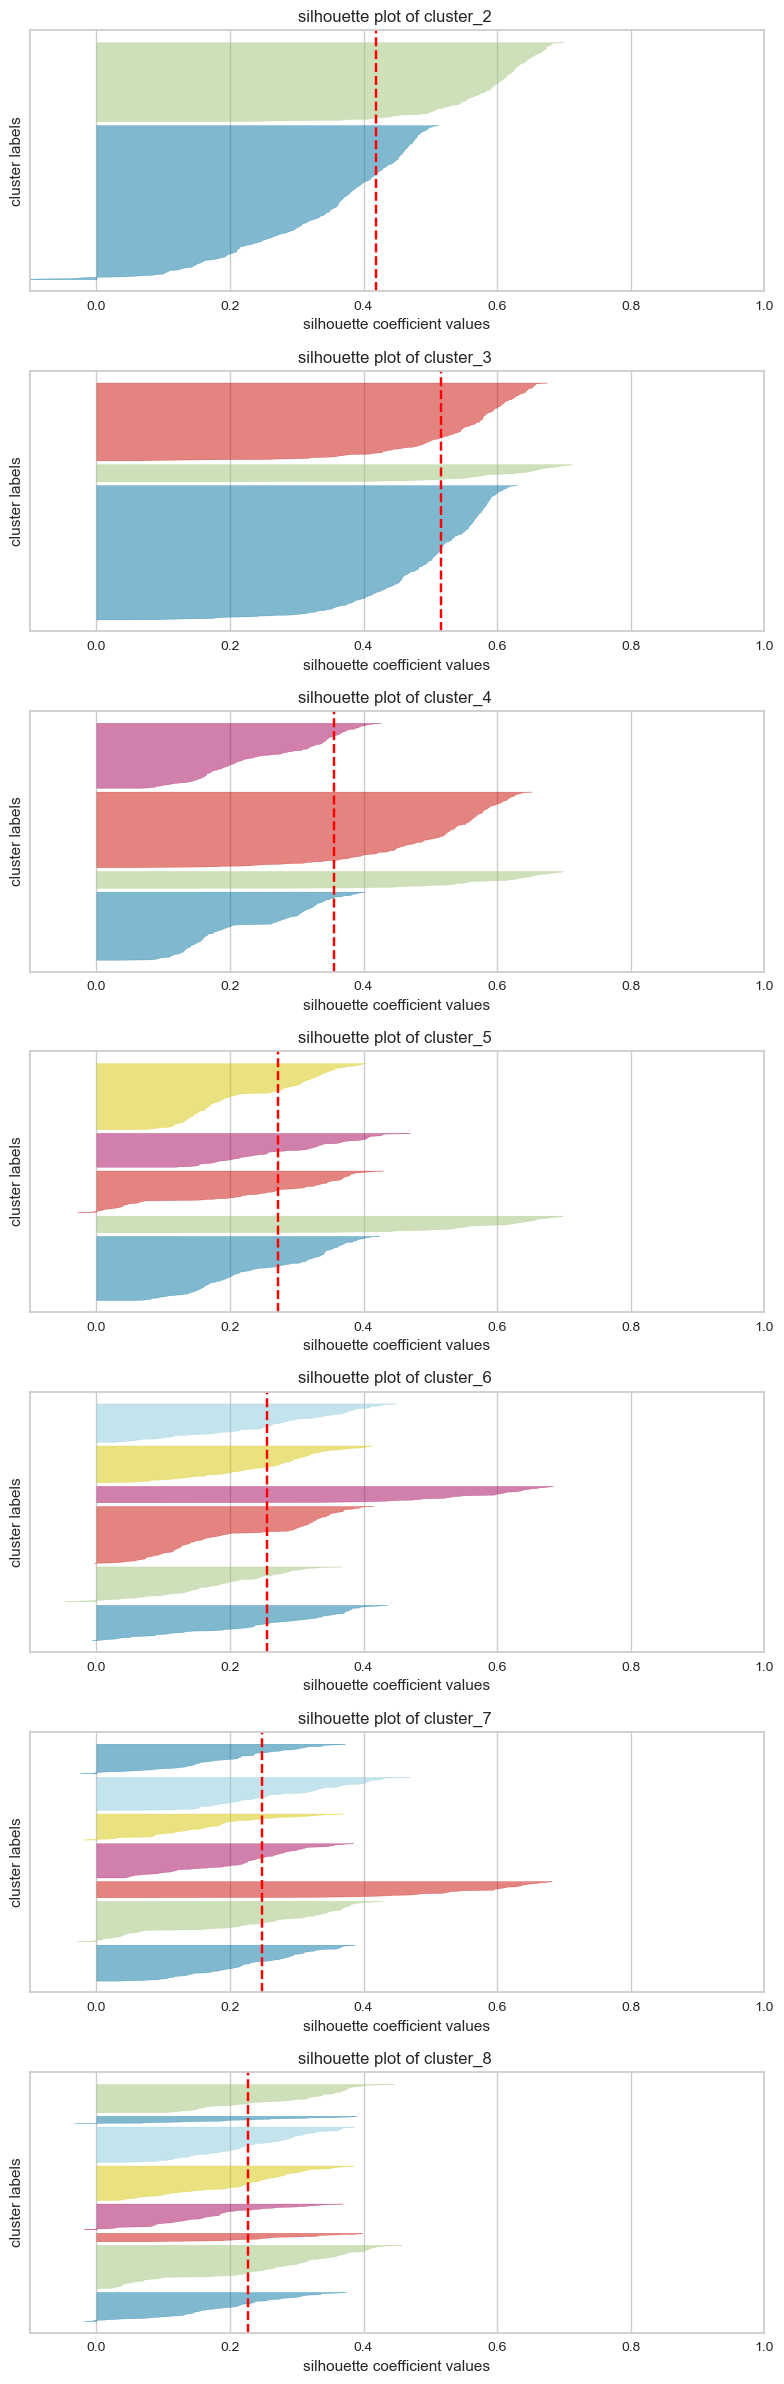

In [56]:
fig, ax = plt.subplots(len(range_n_clusters), 1, figsize=(8, 24))

for idx, n_clusters in enumerate(range_n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init = 'k-means++', max_iter = 300, n_init = 10)

    visualizer = SilhouetteVisualizer(kmeans, ax=ax[idx], colors='yellowbrick')
    ax[idx].set_yticks([])
    ax[idx].set_xlim([-0.1,1])
    ax[idx].set_xlabel('silhouette coefficient values')
    ax[idx].set_ylabel('cluster labels')
    ax[idx].set_title(f'silhouette plot of cluster_{n_clusters} ');

    visualizer.fit(x)

plt.tight_layout()
plt.show()

- Silhouette score is higher when the number of clusters is 3, so we can take 3 clusters for kmeans cluster algorithm.

In [74]:
kmeans.predict([[8,26,8,5,7]])

array([0])

In [75]:
kmeans.predict([[2,3,9,3,2]])

array([2])